In [1]:
#Importing required libraries
import keras, os
import numpy as np
import tensorflow as tf
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.metrics import Precision, Recall
from keras import optimizers
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from keras import backend as K
from keras import regularizers

In [2]:
train=True
num_classes = 100

In [3]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169009152/169001437 [==============================] - 7s 0us/step


In [4]:
#Model summary using the VGG16 archtecture
input = keras.layers.Input(shape=(32,32,3))
model = keras.layers.Conv2D(filters=64,kernel_size=3, padding='same')(input)
model = keras.layers.Conv2D(filters=64,kernel_size=3, padding='same')(model)
model = keras.layers.LeakyReLU()(model)
model = keras.layers.MaxPool2D(pool_size=2)(model)

model = keras.layers.BatchNormalization()(model)
model = keras.layers.Conv2D(filters=128,kernel_size=3, padding='same')(model)
model = keras.layers.Conv2D(filters=128,kernel_size=3, padding='same')(model)
model = keras.layers.LeakyReLU()(model)
model = keras.layers.MaxPool2D(pool_size=2)(model)

model = keras.layers.BatchNormalization()(model)
model = keras.layers.Conv2D(filters=256,kernel_size=3, padding='same')(model)
model = keras.layers.Conv2D(filters=256,kernel_size=3, padding='same')(model)
model = keras.layers.Conv2D(filters=256,kernel_size=3, padding='same')(model)
model = keras.layers.LeakyReLU()(model)
model = keras.layers.MaxPool2D(pool_size=2)(model)

# model = keras.layers.BatchNormalization()(model)
# model = keras.layers.Conv2D(filters=512,kernel_size=3, padding='same')(model)
# model = keras.layers.Conv2D(filters=512,kernel_size=3, padding='same')(model)
# model = keras.layers.Conv2D(filters=512,kernel_size=3, padding='same')(model)
# model = keras.layers.LeakyReLU()(model)
# model = keras.layers.MaxPool2D(pool_size=2)(model)

# model = keras.layers.Conv2D(filters=512,kernel_size=3, padding='same')(model)
# model = keras.layers.Conv2D(filters=512,kernel_size=3, padding='same')(model)
# model = keras.layers.Conv2D(filters=512,kernel_size=3, padding='same')(model)
# model = keras.layers.LeakyReLU()(model)
# model = keras.layers.MaxPool2D(pool_size=2)(model)
# model = keras.layers.BatchNormalization()(model)

model = keras.layers.Flatten()(model)

model = BatchNormalization()(model)
model = Dense(units=4096)(model)
model = keras.layers.ReLU()(model)

model = BatchNormalization()(model)
model = Dense(units=4096)(model)
model = keras.layers.ReLU()(model)
out = Dense(units=100, activation='softmax')(model)

model = keras.Model(input,out)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)      

In [5]:
#optimization details
opt = SGD(lr=0.0001,decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy', 'Precision','Recall'])

In [6]:
batch_size = 128


checkpoint = ModelCheckpoint("vggSGDbatchnorm.h5", monitor='val_accuracy', verbose=2, save_best_only=True, save_weights_only=True, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=30, verbose=2, mode='auto')


# Data Augmentation
datagen = ImageDataGenerator(width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = False,
                             rotation_range = 10,
                             fill_mode = 'nearest')


hist = model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch= x_train.shape[0] // batch_size,
                    epochs=200,
                    validation_data=(x_test, y_test),callbacks=[checkpoint, early],verbose=2)




Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200

Epoch 00001: val_accuracy improved from -inf to 0.12000, saving model to vggSGDbatchnorm.h5
390/390 - 27s - loss: 4.2972 - accuracy: 0.0702 - precision: 0.5000 - recall: 0.0014 - val_loss: 3.9130 - val_accuracy: 0.1200 - val_precision: 0.6093 - val_recall: 0.0092
Epoch 2/200

Epoch 00002: val_accuracy improved from 0.12000 to 0.15880, saving model to vggSGDbatchnorm.h5
390/390 - 27s - loss: 3.8226 - accuracy: 0.1291 - precision: 0.5974 - recall: 0.0090 - val_loss: 3.6544 - val_accuracy: 0.1588 - val_precision: 0.6424 - val_recall: 0.0203
Epoch 3/200

Epoch 00003: val_accuracy improved from 0.15880 to 0.18880, saving model to vggSGDbatchnorm.h5
390/390 - 26s - loss: 3.6444 - accuracy: 0.1552 - precision: 0.6390 - recall: 0.0160 - val_loss: 3.4721 - val_accuracy: 0.1888 - val_precision: 0.6724 - val_recall: 0.0314
Epoch 4/200

Epoch 00004: val_accuracy did not improve from 0.18880
390/390 - 26s - los

In [7]:
model.save_weights('vggSGDbatchnorm.h5') 
model.load_weights(filepath = 'vggSGDbatchnorm.h5')
scores = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Precison: %.2f%%" % (scores[2]*100))
print("Recall: %.2f%%" % (scores[3]*100))

313/313 - 2s - loss: 1.8738 - accuracy: 0.5204 - precision: 0.7240 - recall: 0.4086
Accuracy: 52.04%
Precison: 72.40%
Recall: 40.86%


Text(0.5, 1.0, 'recall')

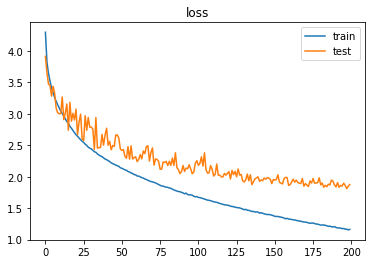

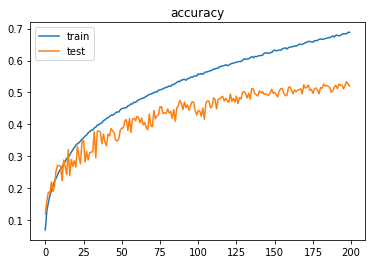

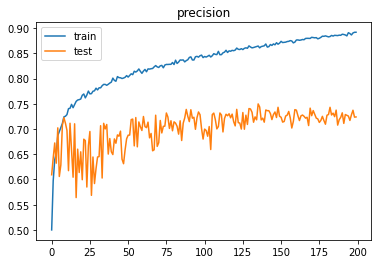

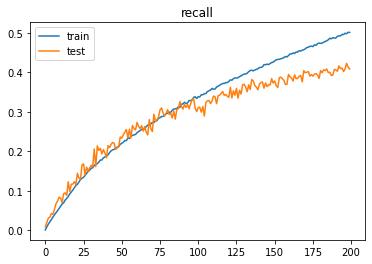

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.figure()
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.legend(['train','test'])
plt.title('precision')
plt.figure()
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.legend(['train','test'])
plt.title('recall')

In [9]:
# Printing the saved weights in numpy arrays
for layer in model.layers: 
  print(layer.get_weights())

[]
[array([[[[ 9.38020274e-02,  9.33462456e-02, -7.54203871e-02, ...,
           2.34111957e-02,  7.64025301e-02, -1.01624280e-01],
         [ 2.60892473e-02,  6.14246866e-03,  7.80602098e-02, ...,
           5.92787154e-02, -1.26522064e-01, -3.02738547e-02],
         [ 5.29945903e-02, -5.63847199e-02, -4.04275060e-02, ...,
           1.61246900e-02,  5.36064357e-02,  3.76291610e-02]],

        [[-1.49046620e-02,  2.71349400e-02, -7.59967491e-02, ...,
           6.54668137e-02,  5.58868162e-02, -8.65148474e-03],
         [-7.97534734e-02,  3.22777033e-02, -6.56448528e-02, ...,
           9.02846232e-02, -6.54962957e-02,  6.87817335e-02],
         [ 3.98625359e-02, -3.33498307e-02, -2.86966609e-03, ...,
           1.97754498e-03,  1.08315580e-01,  8.89640301e-03]],

        [[-8.02103505e-02, -9.94312093e-02,  1.05046453e-02, ...,
           2.36712731e-02,  9.01721865e-02,  1.97135545e-02],
         [-4.03437647e-04,  1.57048609e-02,  7.14817718e-02, ...,
           3.44450027e-02,  5.